#Car Price Prediction using Random Forest Regressor


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('./input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# load the dataset

In [3]:
df = pd.read_csv("car_prediction_data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

# pre_processing

In [6]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
new_data = df.drop(['Car_Name'], axis=1)
new_data['Current_year'] = 2024
new_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [11]:
new_data['number_of_year'] = new_data['Current_year'] - new_data['Year']
new_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,number_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [12]:
new_data.drop(['Year'],axis=1,inplace=True)

In [13]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,number_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [14]:
new_data = pd.get_dummies(new_data,drop_first=True)

In [15]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2024,10,False,True,False,True
1,4.75,9.54,43000,0,2024,11,True,False,False,True
2,7.25,9.85,6900,0,2024,7,False,True,False,True
3,2.85,4.15,5200,0,2024,13,False,True,False,True
4,4.60,6.87,42450,0,2024,10,True,False,False,True


In [16]:
new_data = new_data.drop(['Current_year'], axis=1)
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


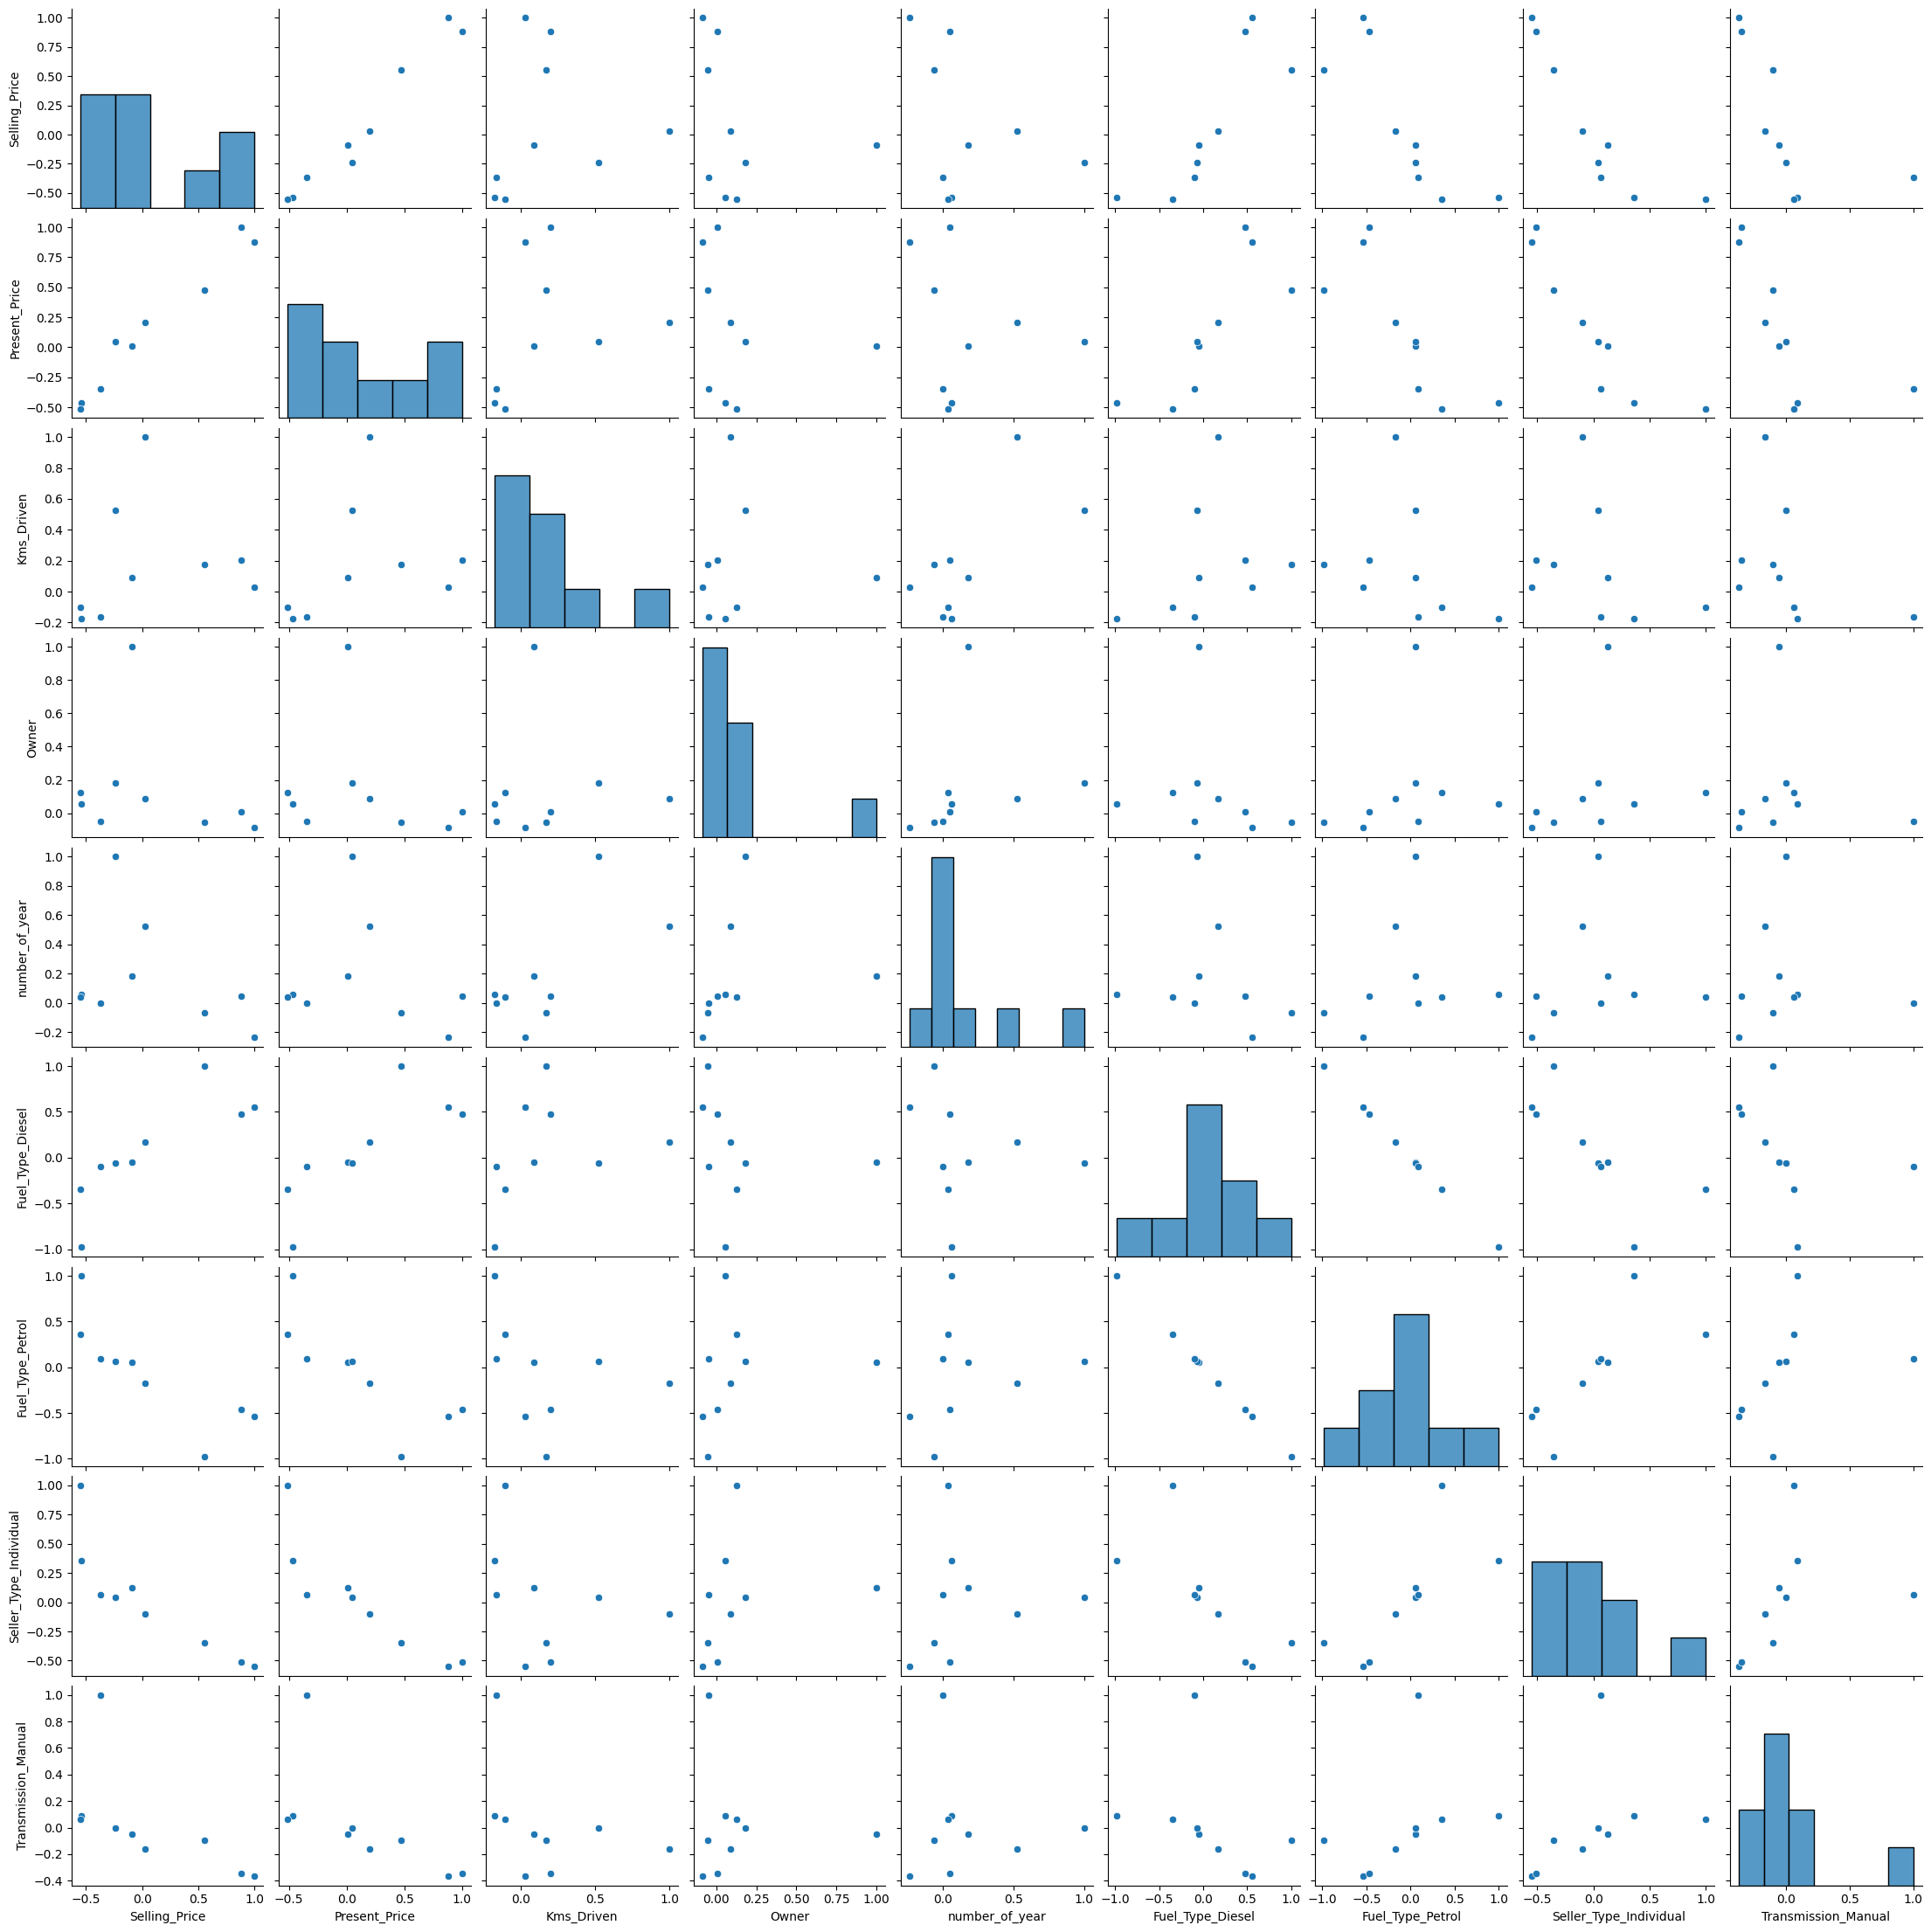

In [17]:
import seaborn as sns

sns.pairplot(new_data.corr())

In [18]:
new_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'number_of_year', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

# Features importance

In [19]:
new_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'number_of_year', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [20]:
X = new_data.iloc[:,1:]
y = new_data.iloc[:, 0]

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.34577838 0.04023434 0.0004468  0.07586164 0.24351201 0.00763167
 0.12995253 0.15658262]


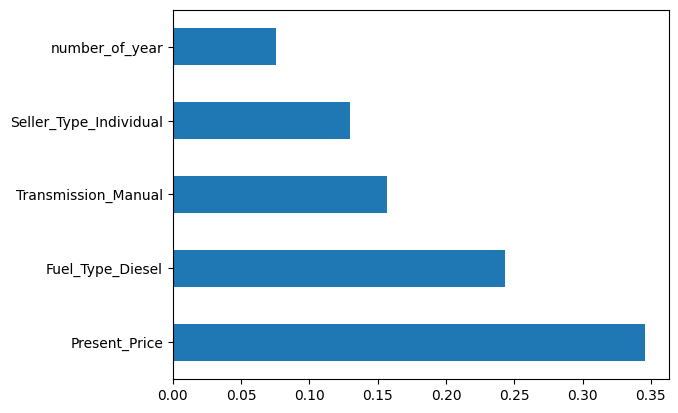

In [23]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()


## visualization 

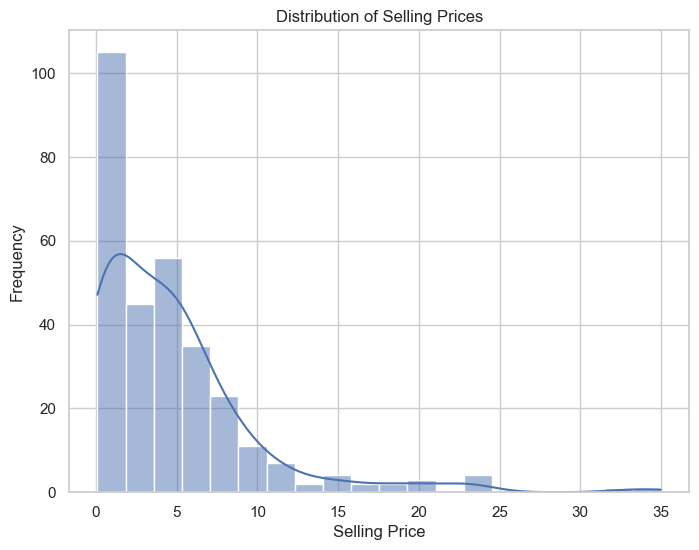

In [43]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution of Selling Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

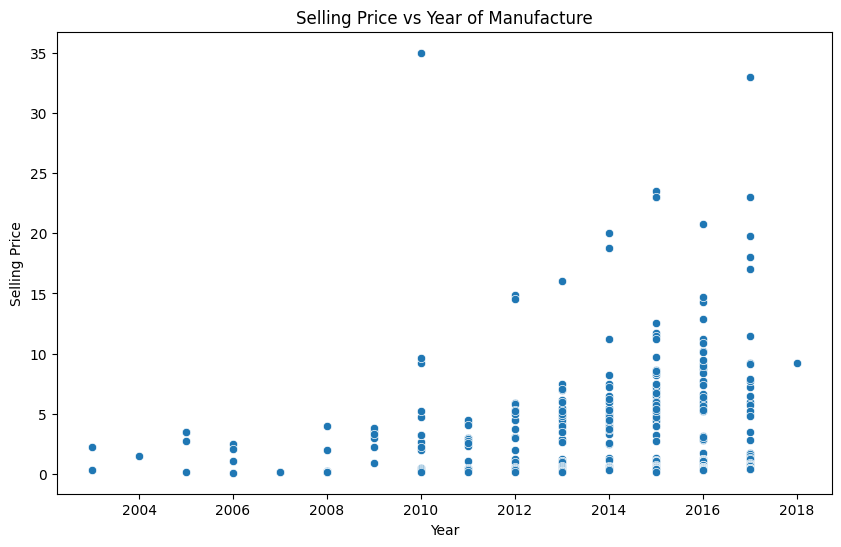

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Selling Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

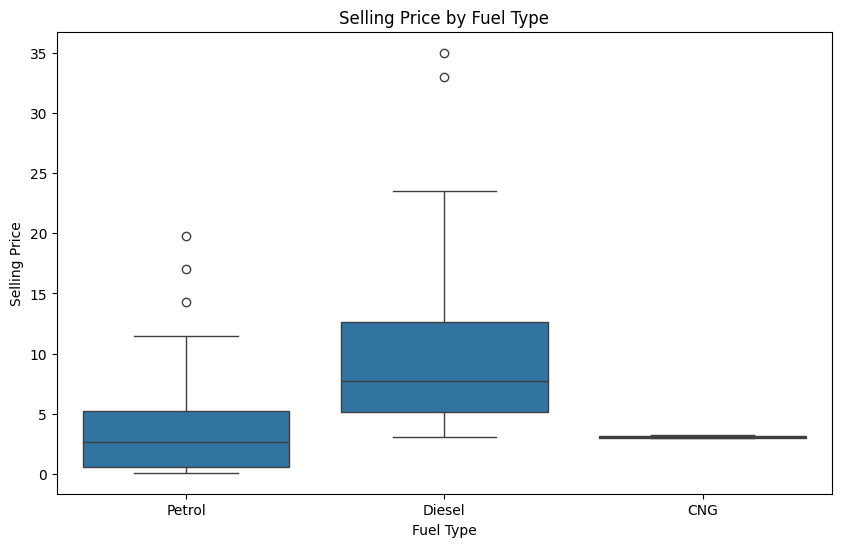

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

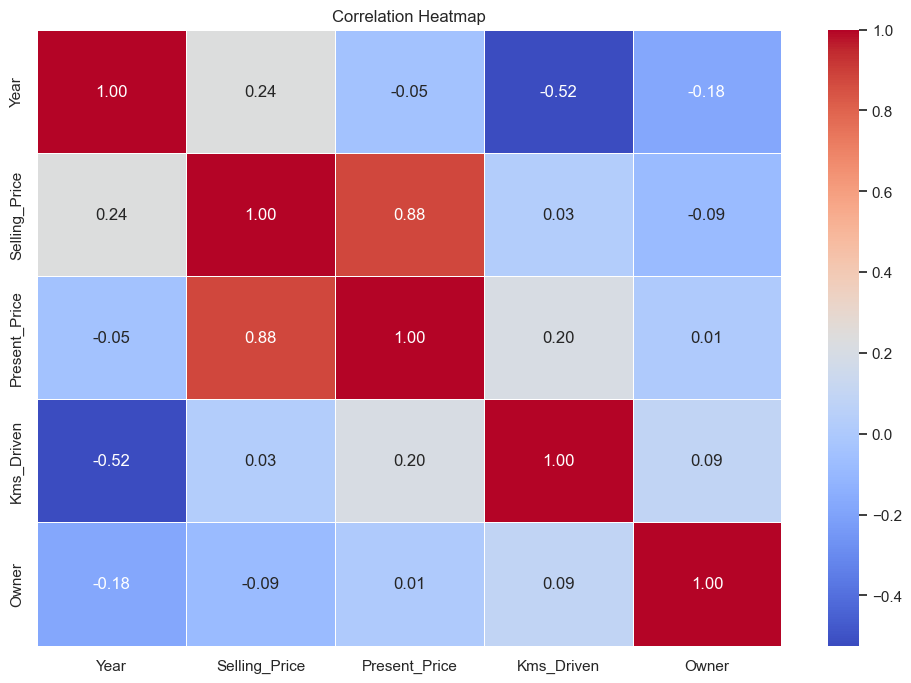

In [40]:


# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

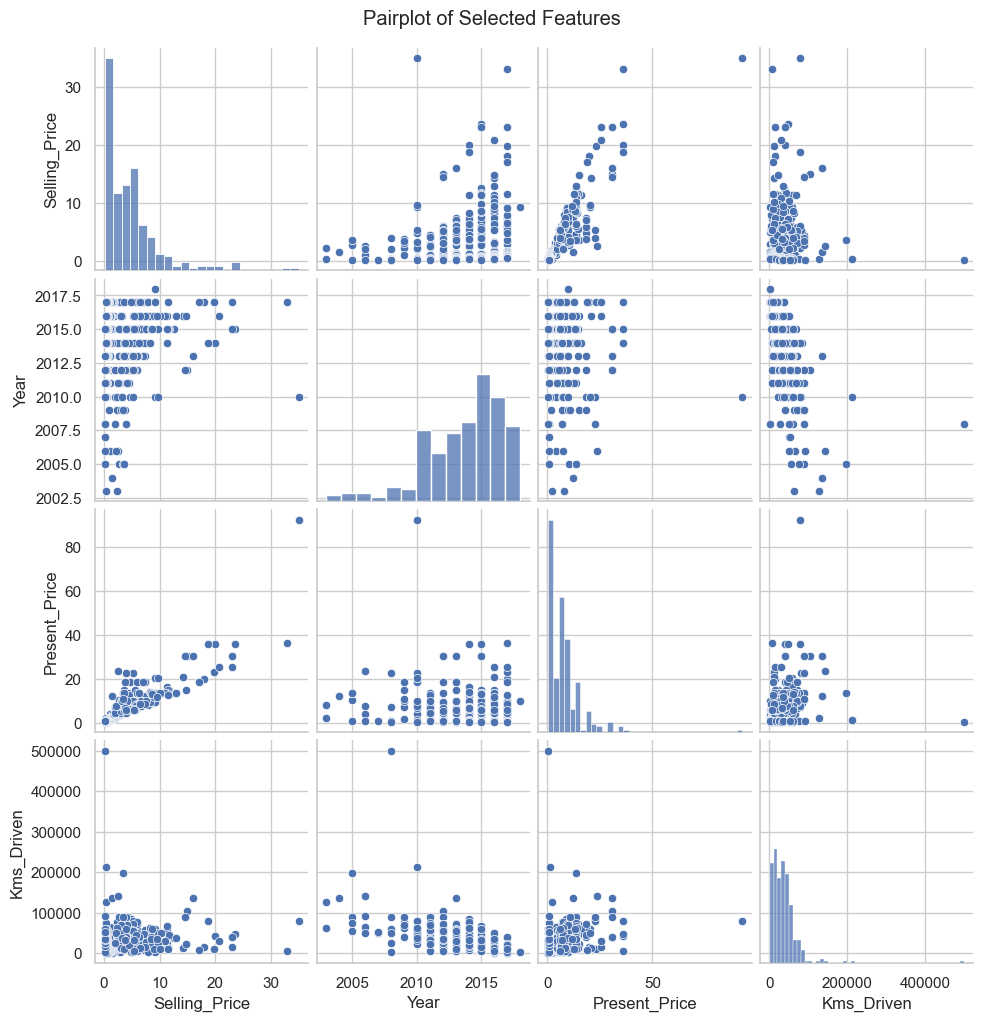

In [46]:
sns.pairplot(df[['Selling_Price', 'Year', 'Present_Price', 'Kms_Driven']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

#Spliting data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

#Model: Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [27]:
model = RandomForestRegressor()

In [28]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


##Use the random grid to search for best hyperparameters

In [29]:
model=RandomizedSearchCV(
    estimator = model, 
    param_distributions = random_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, cv = 5, verbose=2, 
    random_state=42, n_jobs = 1
)

In [30]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
prediction = model.predict(X_test)

In [32]:
data_frame = {
    'Actual_Value': y_test,
    'Prediction_Value':prediction
}

pred_vs_actu = pd.DataFrame(data_frame, columns=data_frame.keys())
pred_vs_actu.head()


,Actual_Value,Prediction_Value
223,8.25,7.11235
150,0.50,0.54295
226,5.25,5.04720
296,9.50,9.28497
52,18.00,16.47674


<Axes: xlabel='Selling_Price', ylabel='Density'>

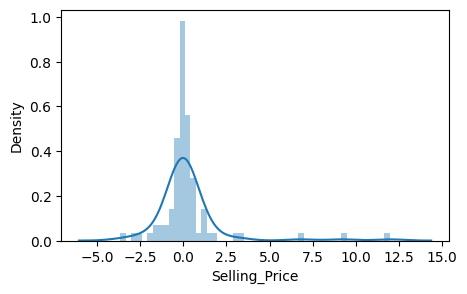

In [33]:
plt.figure(figsize=(5,3))
sns.distplot(y_test-prediction)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_metrics(y_test, prediction):
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('MSE:', mean_squared_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

In [35]:
evaluate_metrics(y_test, prediction)

MAE: 0.8776239560439544
MSE: 3.9102987869252774
RMSE: 1.9774475434067214
